In [3]:
import tensorflow as tf
import pathlib

In [4]:
data_url = ''

In [5]:
zip_dir = tf.keras.utils.get_file('fruits360.zip', origin=data_url, extract=True)

In [6]:
path = pathlib.Path(zip_dir).parent / 'fruits360_filtered'

In [7]:
train_dir = path / 'Training'
validation_dir = path / 'Test'

In [8]:
total_train = 11398
total_val = 4752

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_img_gen = ImageDataGenerator(
    rescale=1./255, rotation_range=40, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, fill_mode='nearest'
)

In [11]:
validation_img_gen = ImageDataGenerator(rescale=1./255) 

In [12]:
batch_size = 16
img_height = 100
img_width = 100
channel = 3

In [13]:
train_data_gen = train_img_gen.flow_from_directory(
    batch_size=batch_size, directory=train_dir, target_size=(
        img_height, img_width
    )
)

Found 11398 images belonging to 120 classes.


In [14]:
val_data_gen = validation_img_gen.flow_from_directory(
    batch_size=batch_size, directory=validation_dir, target_size=(
        img_height, img_width
    )
)

Found 4752 images belonging to 120 classes.


In [15]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers

In [16]:
base_model = VGG16(
    input_shape=(
        img_height, img_width, channel
    ), weights='imagenet', include_top=False
)

In [17]:
base_model.trainable = False
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [18]:
model = tf.keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(120, activation='softmax')
])

In [19]:
optimizer = tf.keras.optimizers.Adam(0.001)

In [20]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              4609000   
_________________________________________________________________
dense_1 (Dense)              (None, 120)               120120    
Total params: 19,443,808
Trainable params: 4,729,120
Non-trainable params: 14,714,688
_________________________________________________________________


In [24]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=5,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
712/712 [==============================] - 42s 59ms/step - loss: 0.2507 - accuracy: 0.9206 - val_loss: 0.3567 - val_accuracy: 0.8904
Epoch 2/5
712/712 [==============================] - 40s 56ms/step - loss: 0.2532 - accuracy: 0.9200 - val_loss: 0.4797 - val_accuracy: 0.8590
Epoch 3/5
712/712 [==============================] - 37s 52ms/step - loss: 0.2323 - accuracy: 0.9236 - val_loss: 0.3910 - val_accuracy: 0.8864
Epoch 4/5
712/712 [==============================] - 38s 54ms/step - loss: 0.2087 - accuracy: 0.9307 - val_loss: 0.5171 - val_accuracy: 0.8647
Epoch 5/5
712/712 [==============================] - 38s 54ms/step - loss: 0.1996 - accuracy: 0.9338 - val_loss: 0.4826 - val_accuracy: 0.8628


In [23]:
import matplotlib.pyplot as plt

In [26]:
# create a dictionary of the model history
history_dict = hisotry.history
loss_values = hisotry_dict['loss']
val_loss_values = hisotry_dict['val_loss']
acc_values = hisotry_dict['accuracy']
val_acc_values = hisotry_dict['val_accuracy']
epochs = range(1, len(hisotry_dict['accuracy']) + 1)

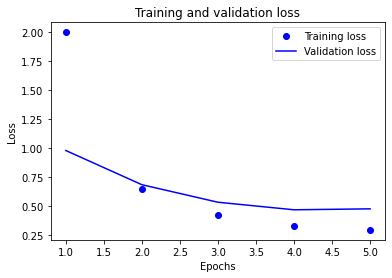

In [27]:
# plot the training/validation loss
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

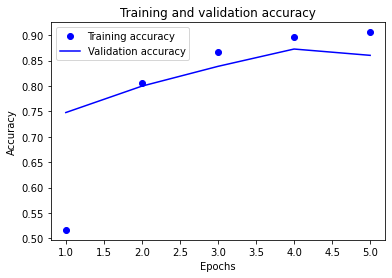

In [28]:
# plot the training/validation accuracy
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
test_loss, test_acc = model.evaluate(val_data_gen)
print('Model testing accuracy/testing loss: ', test_acc, " ", test_loss)

297/297 [==============================] - 7s 22ms/step - loss: 0.4826 - accuracy: 0.8628
Model testing accuracy/testing loss:  0.8627946376800537   0.48264288902282715
